In [1]:
import pandas as pd
import numpy as np

In [2]:
# n = int(input())
# #complexity is roughly O(n) or \theta(n)
# for i in range(n):
#     str_ = '*' * (i + 1)
#     print(str_)

In [3]:
# n = int(input())
# #complexity is roughly O(n^2)
# for i in range(n):  #print 0, 1, 2
#     for j in range(i+1):
#         print('*', end='')
#     print('')

In [4]:
import numpy as np
a = np.arange(24).reshape(2,3,4)

In [5]:
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [6]:
odd = a%2==1
a[odd]

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])

In [7]:
#index
#np.where

result = np.where(odd)

In [8]:
list(zip(result[0], result[1], result[2]))

[(0, 0, 1),
 (0, 0, 3),
 (0, 1, 1),
 (0, 1, 3),
 (0, 2, 1),
 (0, 2, 3),
 (1, 0, 1),
 (1, 0, 3),
 (1, 1, 1),
 (1, 1, 3),
 (1, 2, 1),
 (1, 2, 3)]

In [9]:
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [10]:
a[0, 0, 1]

1

In [11]:
a[1, 2, 0]

20

In [12]:
a[1, 2, 1]

21

In [13]:
ix = list(zip([0, 0, 1], [1, 2, 0], [1, 2, 1]))
ix

[(0, 1, 1), (0, 2, 2), (1, 0, 1)]

In [14]:
a[[0, 1, 1], [0, 2, 2], [1, 0, 1]]

array([ 1, 20, 21])

In [15]:
#Pandas is built on top of Numpy
#Numpy is faster, but Pandas has added features
#added features include 
#data cleansing, filtering, groupby, merge/concatenate

#Pandas have two data structures
#series - one dimension data / one feature
#dataframe - multidimension data / >1 features

#How to create a series

#1. create a series using a list
a = [0.25, 0.5, 0.75, 1.0]

#pandas.Series
data_pd = pd.Series(a)

In [16]:
data_pd

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [17]:
#2. Create a series using a numpy array
numpy_arr = np.array(a)
data_pd = pd.Series(numpy_arr)
data_pd

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [18]:
#access index
#so this index can be iterated
type(data_pd.index)

pandas.core.indexes.range.RangeIndex

In [19]:
for i in data_pd.index:
    print(i)

0
1
2
3


In [20]:
#access the values
data_pd.values

array([0.25, 0.5 , 0.75, 1.  ])

In [21]:
type(data_pd.values)

numpy.ndarray

In [22]:
#indexing
#indexing in Pandas is very similar to Numpy
#BUT there is one confusing part - implicit index vs. explicit index

data_pd

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [23]:
#indexing in series
data_pd[1]  #single digit => explicit index
data_pd[-2:]  #slicing => implicit index
# data_pd[-1]  #single digit => explicit index => does not exist

2    0.75
3    1.00
dtype: float64

In [24]:
#string indexing and integer indexing are different

nump_arr = np.arange(5)

#indexing using strings
data_pd = pd.Series(nump_arr, index=['a', 'b', 'c', 'd', 3])

print(data_pd)

print(data_pd[3]) #single digit, it uses explicit index

a    0
b    1
c    2
d    3
3    4
dtype: int64
4


In [25]:
#access key a
data_pd['a'] #using explicit index

0

In [26]:
# data_pd[2]  #using explicit index

In [27]:
print(data_pd)
data_pd[1:3] #using implicit index

a    0
b    1
c    2
d    3
3    4
dtype: int64


b    1
c    2
dtype: int64

In [28]:
#you can only perform -1 indexing with ONLY str indexes (all)
#other you cannot

In [29]:
#1. create Series from list
#2. create Series from numpy array
#3. create Series from dictionary

dict_ = {'Chiangrai': 111,
        'Pathum Thani': 222,
        'Bangkok': 333,
        'Chiangmai': 444}

data_pd = pd.Series(dict_)
data_pd  #key => index; value => values

Chiangrai       111
Pathum Thani    222
Bangkok         333
Chiangmai       444
dtype: int64

In [30]:
#string is object
#string is basically an object/sequence of characters
data_pd.index

Index(['Chiangrai', 'Pathum Thani', 'Bangkok', 'Chiangmai'], dtype='object')

In [31]:
data_pd

Chiangrai       111
Pathum Thani    222
Bangkok         333
Chiangmai       444
dtype: int64

In [32]:
#slice based on your string indexing
#IT includes Bangkok
data_pd['Chiangrai':'Bangkok']

Chiangrai       111
Pathum Thani    222
Bangkok         333
dtype: int64

In [33]:
#4. create a series from a scalar
data_pd = pd.Series(5, index=[2, 3, 8])
data_pd

2    5
3    5
8    5
dtype: int64

In [34]:
data_pd = pd.Series([3, 6, 9], index=[2, 3, 8])
data_pd

2    3
3    6
8    9
dtype: int64

In [35]:
data_pd[2]  #3  #an integer is an explicit index

3

In [36]:
data_pd[1:2] #slicing uses implicit index => just like numpy

3    6
dtype: int64

In [37]:
#DataFrame

#1. create dataframe using two dict
#key of the dictionary => index
#value of the dictionary => values
#dict => columns

#[] list; ,
#() tuples; ,
#{} dictionary; ,    k:v; k,v=> any type
#np.array(list, tuples) => [()]

pop_dict = {'Chiangrai': 111,
           'Pathum Thani': 222,
           'Bangkok': 333,
           'Chiangmai': 444}

area_dict = {'Chiangrai': 2,
           'Pathum Thani': 3,
           'Bangkok': 4,
           'Chiangmai': 5}

states = pd.DataFrame({'population': pop_dict,
                       'area': area_dict})

states

,population,area
Chiangrai,111,2
Pathum Thani,222,3
Bangkok,333,4
Chiangmai,444,5


In [38]:
for i in states.index:
    print(i)
    
type(states.index)

Chiangrai
Pathum Thani
Bangkok
Chiangmai


pandas.core.indexes.base.Index

In [39]:
type(states.values)

numpy.ndarray

In [40]:
#changes in pd.values (type numpy) will
#reflect the changes in the pandas dataframe/series itself
states.values[0, 0] = 99

In [41]:
states

,population,area
Chiangrai,99,2
Pathum Thani,222,3
Bangkok,333,4
Chiangmai,444,5


In [42]:
#Chiangmai is included!
#explicit indexing
#slicing uses implicit index
#explicit indexing will include the stop parameter
#implicit will not
states['Chiangrai':'Chiangmai']

,population,area
Chiangrai,99,2
Pathum Thani,222,3
Bangkok,333,4
Chiangmai,444,5


In [43]:
type(states['Chiangrai':'Chiangmai']['population'])

pandas.core.series.Series

In [44]:
states['population']['Chiangrai':'Chiangmai']

Chiangrai        99
Pathum Thani    222
Bangkok         333
Chiangmai       444
Name: population, dtype: int64

In [45]:
states

,population,area
Chiangrai,99,2
Pathum Thani,222,3
Bangkok,333,4
Chiangmai,444,5


In [46]:
#indexing in dataframe access columns!!!
# states['Chiangrai']

In [47]:
states.index #pandas.index object behaves very much like numpy array

Index(['Chiangrai', 'Pathum Thani', 'Bangkok', 'Chiangmai'], dtype='object')

In [48]:
states.index[-1]

'Chiangmai'

In [49]:
#numpy has only implicit indexing
states.index[1:3]

Index(['Pathum Thani', 'Bangkok'], dtype='object')

In [50]:
states.columns

Index(['population', 'area'], dtype='object')

In [51]:
#1. create Dataframe from two dict
#2. create Dataframe from series

pop_series = pd.Series(pop_dict)
pd_from_series = pd.DataFrame(pop_series, columns=['pop'])

In [52]:
pd_from_series

,pop
Chiangrai,111
Pathum Thani,222
Bangkok,333
Chiangmai,444


In [53]:
#3. create DataFrame from list of dicts
data = [{'a': i, 'b': 2 * i} for i in range(3)]
print(data)
pd_from_list_dict = pd.DataFrame(data, index=[3, 6, 9])
pd_from_list_dict

[{'a': 0, 'b': 0}, {'a': 1, 'b': 2}, {'a': 2, 'b': 4}]


,a,b
3,0,0
6,1,2
9,2,4


In [54]:
#4 create DataFrame from 2D numpy array
twod_numpy = np.random.rand(3, 2)
twod_numpy

array([[0.96330503, 0.36578948],
       [0.13236631, 0.65820188],
       [0.03970619, 0.24364323]])

In [55]:
index = ['a', 'b', 'c']
columns = ['foo', 'bar']

pd_from_numpy = pd.DataFrame(twod_numpy, index=index, columns=columns)

pd_from_numpy

,foo,bar
a,0.963305,0.365789
b,0.132366,0.658202
c,0.039706,0.243643


In [56]:
#indexing/slicing/fancy indexing
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                index = ['a', 'b', 'c', 'd'])

data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [57]:
# data['b'] #explicit index

In [58]:
# data[-1] #implicit index

In [59]:
#add data
data['e'] = 99

In [60]:
data

a     0.25
b     0.50
c     0.75
d     1.00
e    99.00
dtype: float64

In [61]:
data['42390309309'] = 'Chaky'

In [62]:
data

a               0.25
b                0.5
c               0.75
d                  1
e                 99
42390309309    Chaky
dtype: object

In [63]:
#in   => keys
'a' in data

True

In [64]:
#print keys
data.keys()

Index(['a', 'b', 'c', 'd', 'e', '42390309309'], dtype='object')

In [65]:
#what if i want the values
#data.items()
data.items()

In [66]:
list(data.items())

[('a', 0.25),
 ('b', 0.5),
 ('c', 0.75),
 ('d', 1.0),
 ('e', 99.0),
 ('42390309309', 'Chaky')]

In [67]:
for ix, (k, v) in enumerate(data.items()):
    print(ix, ": ", k, ' => ', v)

0 :  a  =>  0.25
1 :  b  =>  0.5
2 :  c  =>  0.75
3 :  d  =>  1.0
4 :  e  =>  99.0
5 :  42390309309  =>  Chaky


In [68]:
data.values  #numpy array

array([0.25, 0.5, 0.75, 1.0, 99.0, 'Chaky'], dtype=object)

In [69]:
data['a': 'c'] #explicit index; #include the stop parameter

a    0.25
b     0.5
c    0.75
dtype: object

In [70]:
data[0:2]  #implicit index; #exclude the stop parameter (no c)

a    0.25
b     0.5
dtype: object

In [71]:
#masking
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                index = ['a', 'b', 'c', 'd'])

data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [72]:
#fancy indexing
data['e'] = 999

In [73]:
data[['a', 'e']]

a      0.25
e    999.00
dtype: float64

In [74]:
data['e']  #I will NOT be able to do tis in DataFrame

999.0

In [75]:
data = pd.Series(['a', 'b', 'c'], index=(1, 3, 5))
data

1    a
3    b
5    c
dtype: object

In [76]:
data[1:3]  #implicit or explicit

3    b
5    c
dtype: object

In [77]:
# data.iloc  #implicit
# data.loc   #explicit

data.iloc[1:3] #implicit will not include the stop parameter

3    b
5    c
dtype: object

In [78]:
data.loc[1:3] #explicit will include stop paramter

1    a
3    b
dtype: object

In [79]:
#DataFrame
pop_dict

{'Chiangrai': 111, 'Pathum Thani': 222, 'Bangkok': 333, 'Chiangmai': 444}

In [80]:
area_dict = {'Chiangrai': 2,
           'Pathum Thani': 3,
           'Bangkok': 4,
           'Chiangmai': 5,
            'Syria': 6}

In [81]:
data = pd.DataFrame({'pop': pop_dict,
                     'area': area_dict})

In [82]:
data

,pop,area
Chiangrai,111.0,2
Pathum Thani,222.0,3
Bangkok,333.0,4
Chiangmai,444.0,5
Syria,NaN,6


In [83]:
data.area is data['area']

True

In [84]:
data.pop is data['pop'] #pop is a python native method

False

In [85]:
data['Chiangrai':'Syria']

,pop,area
Chiangrai,111.0,2
Pathum Thani,222.0,3
Bangkok,333.0,4
Chiangmai,444.0,5
Syria,NaN,6


In [86]:
#pandas is fantastic for feature engineering
#feature engineering is creating new features
#polynomial
#exponential
#normal interactions between features

data['density'] = data['pop'] / data['area']

In [87]:
data

,pop,area,density
Chiangrai,111.0,2,55.50
Pathum Thani,222.0,3,74.00
Bangkok,333.0,4,83.25
Chiangmai,444.0,5,88.80
Syria,NaN,6,NaN


In [88]:
data.iloc[0]

pop        111.0
area         2.0
density     55.5
Name: Chiangrai, dtype: float64

In [89]:
data.iloc[:3, :1]

,pop
Chiangrai,111.0
Pathum Thani,222.0
Bangkok,333.0


In [90]:
data.loc[:'Bangkok', :'pop']

,pop
Chiangrai,111.0
Pathum Thani,222.0
Bangkok,333.0


In [91]:
#masking + fancy indexing
data.loc[data.density > 60, ['density', 'pop']]

,density,pop
Pathum Thani,74.00,222.0
Bangkok,83.25,333.0
Chiangmai,88.80,444.0


In [92]:
#can we combine iloc and loc
data.loc[:'Bangkok'].iloc[:, :2]

,pop,area
Chiangrai,111.0,2
Pathum Thani,222.0,3
Bangkok,333.0,4


In [93]:
#broadcasting

#random generator basically creates a generator
#that is based on some seed (which is 42)
#rng.random (it will always give you the same result)
#you can get reprocible results
#np.random.seed(42)
rng = np.random.RandomState(42)

df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                 columns = ['A', 'B', 'C', 'D'])

df

,A,B,C,D
0,6,3,7,4
1,6,9,2,6
2,7,4,3,7


In [94]:
#broadcasting 

#broadcasting with a scalar -> number
df_new = np.sin(df * np.pi / 4)
df_new

,A,B,C,D
0,-1.000000,7.071068e-01,-0.707107,1.224647e-16
1,-1.000000,7.071068e-01,1.000000,-1.000000e+00
2,-0.707107,1.224647e-16,0.707107,-7.071068e-01


In [95]:
#broadcasting concept
#needs to deal with how the index is aligned

area = pd.Series({'Alaska': 111,'Texas': 222,'Cali': 333},
                name = 'area')

popu = pd.Series({'Cali': 999,'Texas': 1039,'New York': 765},
                name = 'population')


#how broadcasting work when the index does not work
#why we need to care about the index
#because pandas has this concept of this so called "index"

popu / area  #outer join

Alaska          NaN
Cali        3.00000
New York        NaN
Texas       4.68018
dtype: float64

In [96]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])

A + B #outer join

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [97]:
#if index does not match, fill with some value
A.add(B, fill_value = 0 )

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [98]:
#broadcasting operation between series and dataframe
A = rng.randint(10, size=(3, 4))
df = pd.DataFrame(A, columns = list('QRST'))

df

,Q,R,S,T
0,7,2,5,4
1,1,7,5,1
2,4,0,9,5


In [99]:
df.iloc[0]

Q    7
R    2
S    5
T    4
Name: 0, dtype: int64

In [100]:
#df => dataframe; df.iloc[0] => series
#dataframe - series = dataframe
#=> series | dataframe
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-6,5,0,-3
2,-3,-2,4,1


In [101]:
df

,Q,R,S,T
0,7,2,5,4
1,1,7,5,1
2,4,0,9,5


In [102]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,5,0,3,2
1,-6,0,-2,-6
2,4,0,9,5


In [103]:
#creation
#indexing/slicing/fancy indexing/masking
#broadcasting  => x - x.mean()

#Handling missing data
#how pandas represent missing data
#two types: None and np.nan
#use np.nan -> float value that is ridiculously small, so small that 
#it basically does not exist
#because when you use None, nothing can be added/minus

type(np.nan)
np.nan % 1000000000000000

import sys
sys.getsizeof(np.nan)

24

In [104]:
type(None)
sys.getsizeof(None)

16

In [105]:
#None cannot perform any math operations
# None * 199

In [106]:
vals = np.array([1, np.nan, 3, 4])
np.nansum(vals) #nanmin, nanmax, nanmedian, nanmean

8.0

In [107]:
#converting None to float

#1. when your series has integers or float, None will be cast to float
s = pd.Series([1, None, np.nan])
s

0    1.0
1    NaN
2    NaN
dtype: float64

In [108]:
#2. When you series does not have int or float, but string
s = pd.Series(["Chaky", None, np.nan])
s

0    Chaky
1     None
2      NaN
dtype: object

In [109]:
#3. When you series does not have int or float, but boolean
s = pd.Series([True, None, np.nan])
s

0    True
1    None
2     NaN
dtype: object

In [110]:
#this is Huge
#how to deal with missing data
#drop whole rows, or whole columsn
#replace, replace the np.nan with some values

#dropping
#conservative approach - you simply cut them
#if your column has like 50% missing values, just cut that col
#if you row has some missing value, cut that row
#downside: if what you cut is important
#replace or go collect data

#replacing
#cheating approach
#replacing with what?
#continous value - replace mean, median, random, regression
#categorical value - replace "missing", mode, classification
#WHY I am quite cautious when replacing
#when you replace with some values
#YOU may change the distribution
#YOU may change the variance 
#PEOPLE can cheat to replace whatever they feel like, just
#to get the results they want (Integrity)

#When do I know that I can safely replace
#Minor: when you have 1% missing data
#

In [111]:
#1: Dropping

#pandas treat both np.nan and None as missing data
dfs = pd.Series([1, np.nan, "hello", None])
dfs.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [112]:
dfs[dfs.notnull()]

0        1
2    hello
dtype: object

In [113]:
#dropping => dropna  => drop not available
dfs

0        1
1      NaN
2    hello
3     None
dtype: object

In [114]:
dfs.dropna()  #IS NOT INPLACE  #by default axis = 0

0        1
2    hello
dtype: object

In [115]:
dfs

0        1
1      NaN
2    hello
3     None
dtype: object

In [116]:
df = pd.DataFrame([
    [1, np.nan, 2],
    [2, 3, 5],
    [np.nan, 4, np.nan],
    [4, np.nan, np.nan]
])

df

,0,1,2
0,1.0,NaN,2.0
1,2.0,3.0,5.0
2,NaN,4.0,NaN
3,4.0,NaN,NaN


In [117]:
df[3] = np.nan

In [118]:
df

,0,1,2,3
0,1.0,NaN,2.0,NaN
1,2.0,3.0,5.0,NaN
2,NaN,4.0,NaN,NaN
3,4.0,NaN,NaN,NaN


In [119]:
df.dropna(axis=0, how="all")

,0,1,2,3
0,1.0,NaN,2.0,NaN
1,2.0,3.0,5.0,NaN
2,NaN,4.0,NaN,NaN
3,4.0,NaN,NaN,NaN


In [120]:
#1. Dropping => dropna
#2. Replacing => fillna

df

,0,1,2,3
0,1.0,NaN,2.0,NaN
1,2.0,3.0,5.0,NaN
2,NaN,4.0,NaN,NaN
3,4.0,NaN,NaN,NaN


In [121]:
df.fillna(df.mean())

,0,1,2,3
0,1.000000,3.5,2.0,NaN
1,2.000000,3.0,5.0,NaN
2,2.333333,4.0,3.5,NaN
3,4.000000,3.5,3.5,NaN


In [122]:
df

,0,1,2,3
0,1.0,NaN,2.0,NaN
1,2.0,3.0,5.0,NaN
2,NaN,4.0,NaN,NaN
3,4.0,NaN,NaN,NaN


In [123]:
df[1].fillna(df[1].mean(), inplace=True)

In [124]:
df

,0,1,2,3
0,1.0,3.5,2.0,NaN
1,2.0,3.0,5.0,NaN
2,NaN,4.0,NaN,NaN
3,4.0,3.5,NaN,NaN


In [125]:
#what if I don't want to replace with mean
print(df)

#use a function called interpolate
help(df.interpolate)

     0    1    2   3
0  1.0  3.5  2.0 NaN
1  2.0  3.0  5.0 NaN
2  NaN  4.0  NaN NaN
3  4.0  3.5  NaN NaN
Help on method interpolate in module pandas.core.generic:

interpolate(method='linear', axis=0, limit=None, inplace=False, limit_direction='forward', limit_area=None, downcast=None, **kwargs) method of pandas.core.frame.DataFrame instance
    Interpolate values according to different methods.
    
    Please note that only ``method='linear'`` is supported for
    DataFrame/Series with a MultiIndex.
    
    Parameters
    ----------
    method : str, default 'linear'
        Interpolation technique to use. One of:
    
        * 'linear': Ignore the index and treat the values as equally
          spaced. This is the only method supported on MultiIndexes.
        * 'time': Works on daily and higher resolution data to interpolate
          given length of interval.
        * 'index', 'values': use the actual numerical values of the index.
        * 'pad': Fill in NaNs using existing v

In [126]:
#handling missing data

#concatenating datasets

#dataframe concatenation
data_numpy = np.random.rand(3, 2)  #shape 3, 2
index = ['Bangkok', 'Chiangmai', 'Samut Prakan']
columns = ['Population', 'Area']
pd_from_numpy = pd.DataFrame(data_numpy, index=index, columns=columns)
print("==First dataframe==")
print(pd_from_numpy)

data_numpy2 = np.random.rand(4, 3)
index2 = ['Bangkok', 'Chiangmai', 'Samut Prakan', 'Pathum Thani']
columns2 = ['HDI', 'Temperature', 'GDP']
pd_from_numpy2 = pd.DataFrame(data_numpy2, index=index2, columns=columns2)
print("==Second dataframe==")
print(pd_from_numpy2)

==First dataframe==
              Population      Area
Bangkok         0.519793  0.503358
Chiangmai       0.545377  0.134872
Samut Prakan    0.225313  0.199055
==Second dataframe==
                   HDI  Temperature       GDP
Bangkok       0.156473     0.723273  0.239705
Chiangmai     0.920341     0.072751  0.572521
Samut Prakan  0.554182     0.515593  0.289909
Pathum Thani  0.432492     0.398182  0.524114


In [127]:
pd.concat([pd_from_numpy, pd_from_numpy2], axis=1) #outer join

,Population,Area,HDI,Temperature,GDP
Bangkok,0.519793,0.503358,0.156473,0.723273,0.239705
Chiangmai,0.545377,0.134872,0.920341,0.072751,0.572521
Samut Prakan,0.225313,0.199055,0.554182,0.515593,0.289909
Pathum Thani,NaN,NaN,0.432492,0.398182,0.524114


In [128]:
pd.concat([pd_from_numpy, pd_from_numpy2], axis=1, join='inner') #outer join

,Population,Area,HDI,Temperature,GDP
Bangkok,0.519793,0.503358,0.156473,0.723273,0.239705
Chiangmai,0.545377,0.134872,0.920341,0.072751,0.572521
Samut Prakan,0.225313,0.199055,0.554182,0.515593,0.289909


In [129]:
#merging

#merging is based on some ID
#in which you combine

left = pd.DataFrame({'ID': ['001', '002', '003', '005'],
                      'DS': ['B', 'B', 'B', 'C+'],
                      'SAD': ['A', 'B', 'C+', 'F']})
left

,ID,DS,SAD
0,001,B,A
1,002,B,B
2,003,B,C+
3,005,C+,F


In [130]:
right = pd.DataFrame({'ID': ['001', '002', '003', '004'],
                      'HCI': ['B+', 'A', 'A', 'B+'],
                      'SDQI': ['A', 'A', 'B+', 'B']})
right

,ID,HCI,SDQI
0,001,B+,A
1,002,A,A
2,003,A,B+
3,004,B+,B


In [131]:
#merge them based on column ID
result = pd.merge(left, right, on='ID')  #by default- pd.merge is inner join
result

,ID,DS,SAD,HCI,SDQI
0,001,B,A,B+,A
1,002,B,B,A,A
2,003,B,C+,A,B+


In [132]:
result = pd.merge(left, right, on='ID', how='outer')  #by default- pd.merge is inner join
result

,ID,DS,SAD,HCI,SDQI
0,001,B,A,B+,A
1,002,B,B,A,A
2,003,B,C+,A,B+
3,005,C+,F,NaN,NaN
4,004,NaN,NaN,B+,B


In [133]:
result = pd.merge(left, right, on='ID', how='right')  #by default- pd.merge is inner join
result #left right join

,ID,DS,SAD,HCI,SDQI
0,001,B,A,B+,A
1,002,B,B,A,A
2,003,B,C+,A,B+
3,004,NaN,NaN,B+,B


In [134]:
#series
#dataframe

#implicit index
#does it include stop parameter - NO
#explicit index
#Yes

#iloc
#loc

#create series
#list
#numpy array
#dictionary - key-> index  value -> value

#create dataframe
#list of dictionary
#dictionaries
#numpy array - what if dimension is only 1
#pd.DataFrame

#handling missing data
#np.nan None
#drop some na -> dropna
#replace some na -> fillna
#drop vs. fill -> drop is much better, but fill only when you know the distribution

#pd.concat
#pd.merge

In [135]:
#Aggregation

import pandas as pd
import numpy as np

#when you pass in tuples, they are all values
#here you are passing three features
df = pd.DataFrame([
    ['bird', 'Falconiformes', 389],
    ('bird', 'Psittaciformes', 24),
    ['mammal', 'Catlike', 80.2],
    ('mammal', 'Humanlike', np.nan),
    ('mammal', 'FastAnimal', 58)
],
    index = ('falcon', 'parrot', 'lion', 'monkey', 'leopard'),
    columns = ('class', 'species', 'speed'))


In [136]:
df.head()

,class,species,speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Catlike,80.2
monkey,mammal,Humanlike,NaN
leopard,mammal,FastAnimal,58.0


In [137]:
grouped = df.groupby('class')
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

In [138]:
#basically, any DataFrameGroupBy object has a lot of utility functions
#aggregations
grouped.sum()

,speed
class,
bird,413.0
mammal,138.2


In [139]:
grouped = df.groupby(['class', 'species'])
grouped.sum()

type(grouped.sum())

pandas.core.frame.DataFrame

In [140]:
grouped['speed'].median()

type(grouped['speed'].median())

pandas.core.series.Series

In [141]:
#try a real world examples
#example -> planet

import os
os.environ['http_proxy'] = 'http://192.41.170.23:3128'
os.environ['https_proxy'] = 'http://192.41.170.23:3128'

#seaborn is essentially a plotting library
#seaborn is more modern compared to matplotlib
import seaborn as sns
planets = sns.load_dataset('planets')


In [142]:
type(planets)

pandas.core.frame.DataFrame

In [143]:
planets.shape

(1035, 6)

In [144]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [145]:
planets.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [146]:
planets.index

RangeIndex(start=0, stop=1035, step=1)

In [147]:
#aggregation
planets.count()  #median, min, max, std, var, sum, count

method            1035
number            1035
orbital_period     992
mass               513
distance           808
year              1035
dtype: int64

In [148]:
#only describe stuffs that are numerical
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [149]:
planets['mass'].mean()

2.6381605847953233

In [150]:
planets['mass'].fillna(0, inplace=True)

In [151]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,1035.000000,808.000000,1035.000000
mean,1.785507,2002.917596,1.307610,264.069282,2009.070531
std,1.240976,26014.728304,2.993648,733.116493,3.972567
min,1.000000,0.090706,0.000000,1.350000,1989.000000
25%,1.000000,5.442540,0.000000,32.560000,2007.000000
50%,1.000000,39.979500,0.000000,55.250000,2010.000000
75%,2.000000,526.005000,1.255000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


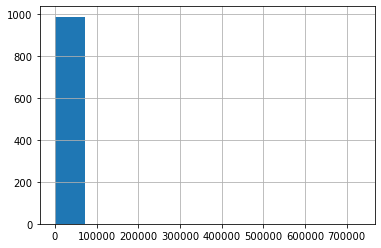

In [152]:
planets['orbital_period'].hist()

In [153]:
planets['orbital_period'].mean()

2002.9175960947584

In [154]:
planets['orbital_period'].std()

26014.72830406252

In [155]:
m = planets['orbital_period'].median()
planets['orbital_period'].fillna(m, inplace=True)

In [156]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,1035.000000,1035.000000,808.000000,1035.000000
mean,1.785507,1921.365579,1.307610,264.069282,2009.070531
std,1.240976,25471.074254,2.993648,733.116493,3.972567
min,1.000000,0.090706,0.000000,1.350000,1989.000000
25%,1.000000,5.747860,0.000000,32.560000,2007.000000
50%,1.000000,39.979500,0.000000,55.250000,2010.000000
75%,2.000000,487.100000,1.255000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [157]:
planets['distance'].fillna(planets['distance'].mean(), inplace=True)

In [158]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000
mean,1.785507,1921.365579,1.307610,264.069282,2009.070531
std,1.240976,25471.074254,2.993648,647.663598,3.972567
min,1.000000,0.090706,0.000000,1.350000,1989.000000
25%,1.000000,5.747860,0.000000,38.010000,2007.000000
50%,1.000000,39.979500,0.000000,105.490000,2010.000000
75%,2.000000,487.100000,1.255000,264.069282,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [159]:

planets.groupby('method').sum()

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,2,1.262360e+03,0.00000,35.750000,4023
Eclipse Timing Variations,15,4.276480e+04,10.25000,2581.786411,18090
Imaging,50,1.420012e+06,0.00000,3751.325693,76347
Microlensing,27,2.271467e+04,0.00000,44872.900668,46225
Orbital Brightness Modulation,5,2.127920e+00,0.00000,2624.069282,6035
Pulsar Timing,11,3.671511e+04,0.00000,2256.277129,9992
Pulsation Timing Variations,1,1.170000e+03,0.00000,264.069282,2007
Radial Velocity,952,4.553151e+05,1341.65638,33421.703490,1110158
Transit,776,8.377523e+03,1.47000,179926.755817,798461


In [160]:
#group by method, show only column 'orbital period', 
#only the first two methods, and show the min
#(planets.groupby('method')['orbital_period'].min()).iloc[:2]
df = planets.groupby('method').min()
df.head(100)

#try to sort  .min, and get the first two methods with the lowest min
df = df.sort_values(['orbital_period'], ascending=True)
df.head(100)

# df['orbital_period'].iloc[:2]



,number,orbital_period,mass,distance,year
method,,,,,
Pulsar Timing,1,0.090706,0.0,264.069282,1992
Orbital Brightness Modulation,1,0.240104,0.0,264.069282,2011
Transit,1,0.355000,0.0,38.000000,2002
Radial Velocity,1,0.736540,0.0,1.350000,1989
Transit Timing Variations,2,22.339500,0.0,264.069282,2011
Imaging,1,39.979500,0.0,7.690000,2004
Microlensing,1,39.979500,0.0,264.069282,2004
Astrometry,1,246.360000,0.0,14.980000,2010
Pulsation Timing Variations,1,1170.000000,0.0,264.069282,2007


In [161]:
#group by method, sum(),  sort by year, distance, => min -> max 
#give me the last three rows, show me columns of distance year
#do a explicit index on the first row

df = planets.groupby('method').sum()
df = df.sort_values(['year', 'distance'], ascending=True)
df.iloc[-3:, 3:].loc['Imaging']


distance     3751.325693
year        76347.000000
Name: Imaging, dtype: float64

In [162]:
# for (k, v) in planets.groupby('method'):
#     print(f"====Method {k}======")
#     print(v['orbital_period'])#imagine this groupby object like a dictionary

In [163]:
#what else you can do with groupby object
#1. It's like a dictionary
#2. g.aggregate()
#3. g.filter()
#f4. g.apply()

#this aggregate takes a list of funcs
#functions can be desdf;lksffined in str or simply func
#you can also write your own aggregation function
planets.groupby('method')['orbital_period'].aggregate(
    ['min', np.min, np.median, max, np.mean, np.std, 'count'])

#filter
#filter takes a function
#this function can be def or lambda
planets.groupby('method').filter(lambda x: x['orbital_period'].std() < 3)

#apply
#apply takes a function
#usually is a def or lambda
planets.groupby('method').apply(lambda x: x.describe())

number  orbital_period  mass     distance  \
method                                                                       
Astrometry                count    2.00        2.000000   2.0     2.000000   
                          mean     1.00      631.180000   0.0    17.875000   
                          std      0.00      544.217663   0.0     4.094148   
                          min      1.00      246.360000   0.0    14.980000   
                          25%      1.00      438.770000   0.0    16.427500   
...                                 ...             ...   ...          ...   
Transit Timing Variations min      2.00       22.339500   0.0   264.069282   
                          25%      2.00       35.569500   0.0   320.267321   
                          50%      2.00       48.495250   0.0   597.000000   
                          75%      2.25       82.758250   0.0  1171.000000   
                          max      3.00      160.000000   0.0  2119.000000   

                                       year  
method                                       
Astrometry                count     2.00000  
                          mean   2011.50000  
                          std       2.12132  
                          min    2010.00000  
                          25%    2010.75000  
...                                     ...  
Transit Timing Variations min    2011.00000  
                          25%    2011.75000  
                          50%    2012.50000  
                          75%    2013.25000  
                          max    2014.00000  

[80 rows x 5 columns]

In [164]:
#pivot tables
titanic = sns.load_dataset('titanic')
titanic.head()

#we have 14 features
#our feature is a die or not die
#classification

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [165]:
#group by sex, column survived, mean
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [166]:
age = pd.cut(titanic['age'], [0, 10, 18, 50, 100])
age

#np.digitize
#cut based on quartile
#pd.qcut
fare = pd.qcut(titanic.fare, 2)

fare

0       (-0.001, 14.454]
1      (14.454, 512.329]
2       (-0.001, 14.454]
3      (14.454, 512.329]
4       (-0.001, 14.454]
             ...        
886     (-0.001, 14.454]
887    (14.454, 512.329]
888    (14.454, 512.329]
889    (14.454, 512.329]
890     (-0.001, 14.454]
Name: fare, Length: 891, dtype: category
Categories (2, interval[float64]): [(-0.001, 14.454] < (14.454, 512.329]]

In [167]:
titanic.groupby(['sex', 'class', age])[['survived']].mean()

survived
sex    class  age                
female First  (0, 10]    0.000000
              (10, 18]   1.000000
              (18, 50]   0.967213
              (50, 100]  1.000000
       Second (0, 10]    1.000000
              (10, 18]   1.000000
              (18, 50]   0.912281
              (50, 100]  0.666667
       Third  (0, 10]    0.500000
              (10, 18]   0.523810
              (18, 50]   0.413793
              (50, 100]  1.000000
male   First  (0, 10]    1.000000
              (10, 18]   0.666667
              (18, 50]   0.442857
              (50, 100]  0.192308
       Second (0, 10]    1.000000
              (10, 18]   0.000000
              (18, 50]   0.069444
              (50, 100]  0.083333
       Third  (0, 10]    0.363636
              (10, 18]   0.103448
              (18, 50]   0.139896
              (50, 100]  0.000000

In [168]:
#pivot table (value, index, columns)
titanic.pivot_table('survived', ['sex', age], 'class')

class                First    Second     Third
sex    age                                    
female (0, 10]    0.000000  1.000000  0.500000
       (10, 18]   1.000000  1.000000  0.523810
       (18, 50]   0.967213  0.912281  0.413793
       (50, 100]  1.000000  0.666667  1.000000
male   (0, 10]    1.000000  1.000000  0.363636
       (10, 18]   0.666667  0.000000  0.103448
       (18, 50]   0.442857  0.069444  0.139896
       (50, 100]  0.192308  0.083333  0.000000

In [169]:
#time series
#pandas author create pandas for financial analysis
from datetime import datetime

In [170]:
#fundamental data structure of date time for python
#time
datetime(year=2025, month=7, day=3)

datetime.datetime(2025, 7, 3, 0, 0)

In [171]:
from dateutil import parser
date = parser.parse("13 7 15 13")
type(date)
date

datetime.datetime(2015, 7, 13, 13, 0)

In [172]:
date.strftime('%')

'%'

In [173]:
date = np.array('2015-07-14', dtype=np.datetime64)
date
type(date)
#np.datetime64 is built on top of python datetime but is more efficient

numpy.ndarray

In [174]:
#numpy array
#broadcasting
date + np.arange(12)

array(['2015-07-14', '2015-07-15', '2015-07-16', '2015-07-17',
       '2015-07-18', '2015-07-19', '2015-07-20', '2015-07-21',
       '2015-07-22', '2015-07-23', '2015-07-24', '2015-07-25'],
      dtype='datetime64[D]')

In [175]:
#pd.to_timedelta
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-14', '2015-07-15', '2015-07-16', '2015-07-17',
               '2015-07-18', '2015-07-19', '2015-07-20', '2015-07-21',
               '2015-07-22', '2015-07-23', '2015-07-24', '2015-07-25'],
              dtype='datetime64[ns]', freq=None)

In [176]:
#this kind of stuff really become useful when you apply to pandas

index = pd.to_datetime(['2014-07-04', '2015-07-04', 
                       '2016-07-04', '2017-07-04', ])

type(index)  #DatetimeIndex is basically built upon np.datetime64 but for pandas

pandas.core.indexes.datetimes.DatetimeIndex

In [177]:
index

DatetimeIndex(['2014-07-04', '2015-07-04', '2016-07-04', '2017-07-04'], dtype='datetime64[ns]', freq=None)

In [178]:
value = np.random.rand(4, 2)
value

array([[0.98694371, 0.13649526],
       [0.85229071, 0.77312275],
       [0.58430742, 0.78462453],
       [0.36508161, 0.88716564]])

In [179]:
columns = ['A', 'B']

data = pd.DataFrame(value, index=index, columns = columns)

In [180]:
data

,A,B
2014-07-04,0.986944,0.136495
2015-07-04,0.852291,0.773123
2016-07-04,0.584307,0.784625
2017-07-04,0.365082,0.887166


In [181]:
data['2015':'2016']

,A,B
2015-07-04,0.852291,0.773123
2016-07-04,0.584307,0.784625


In [182]:
#we already know that creating datetime index is so nice
#1. pd.to_datetime([list of dates])
#2. pd.date_range(stop, stop, period, freq)

In [183]:
index = pd.date_range('2015-07-03', '2015-07-10')
index

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [184]:
index = pd.date_range('2015-07-03', periods=8)
index

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [185]:
#M = Month, MS = Month Start, BH = Business hour
#customeized = 2H30T
index = pd.date_range('2015-07-03', periods=10, freq='MS')
index

from pandas.tseries.offsets import DateOffset

index + DateOffset(days=2)

DatetimeIndex(['2015-08-03', '2015-09-03', '2015-10-03', '2015-11-03',
               '2015-12-03', '2016-01-03', '2016-02-03', '2016-03-03',
               '2016-04-03', '2016-05-03'],
              dtype='datetime64[ns]', freq=None)

In [186]:
# help(pd.date_range)

In [187]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016',
                      data_source='yahoo')

goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


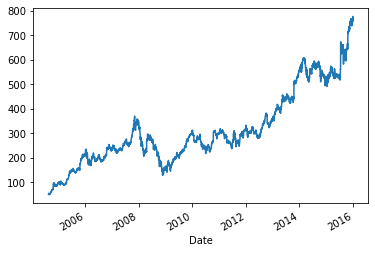

In [188]:
import matplotlib.pyplot as plt
goog_close = goog['Close']
#what is the type of goog_close
#series
goog_close.plot()

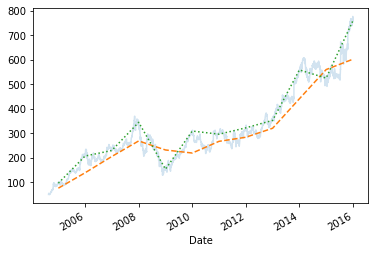

In [190]:
#1 year summary
goog_close.plot(alpha=0.2, style='-') #actual, low level info
goog_close.resample('BA').mean().plot(style='--')  #Business year end - average of each year
goog_close.asfreq('BA').plot(style=':')  #asfreq vs resample - asfreq pick the value

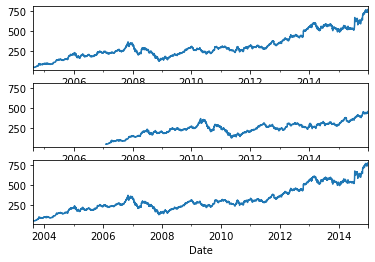

In [197]:
#shift. -> shift the data
#tshift -> shift the index
fig, ax = plt.subplots(3, sharey=True)

goog_close = goog_close.asfreq('D', method='pad')

#ax[0] is the first subplot
goog_close.plot(ax=ax[0])  #original data

#shift the data 900 days - freq (D)
goog_close.shift(900).plot(ax=ax[1])

#shift the index 900 
goog_close.tshift(-365).plot(ax=ax[2])

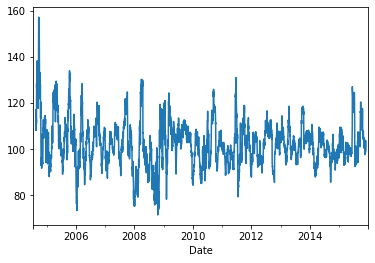

In [201]:
#I want to get a daily differences
#today - yesterday
#give me a series
yesterday = goog_close.shift(1)
today = goog_close

today-yesterday

#do a moving average of window size 3 days
#d1 + d2 + d3 / 3 = d4 moving average
two_days_ago = goog_close.shift(2)
three_days_ago = goog_close.shift(3)
moving_average = (yesterday + two_days_ago +
                  three_days_ago) / 3
moving_average

#perform a monthly return on investment
future_month = goog_close.tshift(-30)
current = goog_close
roi = 100 * (future_month / current)


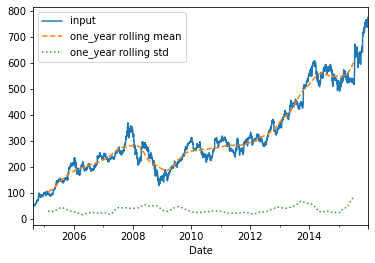

In [202]:
#.rolling -> can be used with series/df
rolling = goog_close.rolling(365, center=True) #moving average of 365 days

data = pd.DataFrame({'input': goog_close,
                    'one_year rolling mean': rolling.mean(),
                    'one_year rolling std': rolling.std()})

data.plot(style=['-', '--', ':'])

In [236]:
#read some csv and put it into a dataframe using .read_csv
#parse_dates will make our value into valid time
#index_col will make Date as our index
data = pd.read_csv('resources/FremontBridge.csv',
                  index_col='Date', parse_dates=True)

In [237]:
data.head(-10)

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-03-31 23:00:00,6.0,10.0
2019-03-31 22:00:00,7.0,14.0
2019-03-31 21:00:00,18.0,15.0
2019-03-31 20:00:00,26.0,31.0
2019-03-31 19:00:00,30.0,58.0
...,...,...
2012-10-03 14:00:00,77.0,51.0
2012-10-03 13:00:00,42.0,48.0
2012-10-03 12:00:00,35.0,41.0


In [238]:
#there is no longer this attribute called Date
#Date is index
#built upon numpy
data.index[:5]

DatetimeIndex(['2019-03-31 23:00:00', '2019-03-31 22:00:00',
               '2019-03-31 21:00:00', '2019-03-31 20:00:00',
               '2019-03-31 19:00:00'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [239]:
#rename my columns
#built upon numpy arrays
data.columns = ['West', 'East']
data.head()

#.rename only one column
# data = data.rename(columns = {'West': 'Something'})
# data.head()

,West,East
Date,,
2019-03-31 23:00:00,6.0,10.0
2019-03-31 22:00:00,7.0,14.0
2019-03-31 21:00:00,18.0,15.0
2019-03-31 20:00:00,26.0,31.0
2019-03-31 19:00:00,30.0,58.0


In [240]:
#check any missing values
data.isna().sum()   #a table of true and false

#fillna with 0
data.fillna(0, inplace=True)

#feature engineering
#create new features that could be meaningful for prediction
#polynomial, exponential, feature interaction

#create new column
#(east + west) ^ 2
data['Total'] = (data.East + data['West'])

In [241]:
data.head()

,West,East,Total
Date,,,
2019-03-31 23:00:00,6.0,10.0,16.0
2019-03-31 22:00:00,7.0,14.0,21.0
2019-03-31 21:00:00,18.0,15.0,33.0
2019-03-31 20:00:00,26.0,31.0,57.0
2019-03-31 19:00:00,30.0,58.0,88.0


In [242]:
#weekly average
#hint: don't use asfreq
weekly = data.resample('W').mean()  #you can use sum(), min(), median(), max()
weekly.head()

,West,East,Total
Date,,,
2012-10-07,60.808333,58.291667,119.100000
2012-10-14,51.660714,48.309524,99.970238
2012-10-21,47.297619,45.017857,92.315476
2012-10-28,41.077381,38.904762,79.982143
2012-11-04,38.142857,34.440476,72.583333


Text(0, 0.5, 'Weekly bicycle count')

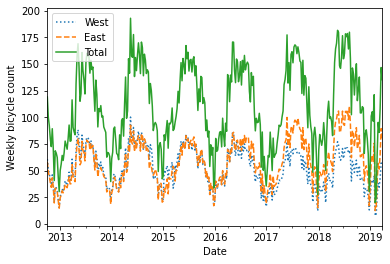

In [243]:
weekly.plot(style=[":", "--", '-'])
plt.ylabel('Weekly bicycle count')

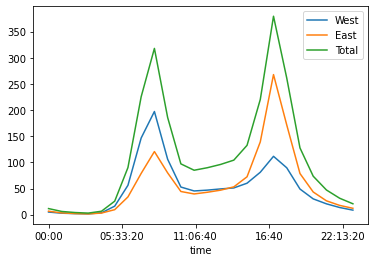

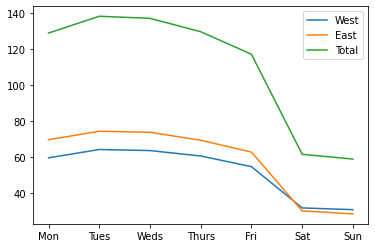

In [255]:
#number of rides on each period of time
#12, 1, 2.....
#data.index.time
data.index.time   #groupby
(data.groupby(data.index.time).mean()).plot()

#number of rides from Monday to Sunday
data.index.dayofweek  #groupby
dayofweek = data.groupby(data.index.dayofweek).mean()
dayofweek.index = ['Mon', 'Tues', 'Weds', 'Thurs', 'Fri', 'Sat', 'Sun']
dayofweek.plot()
# (data.groupby(data.index.dayofweek).mean()).plot()